In [35]:
import tensorflow as tf
import matplotlib.pyplot as plt

## Load the data into train and test sets.

In [37]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Let's examine the data.

In [38]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [39]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## The data consists of 60000 samples in the train dataset and 10000 samples in the test dataset. Each entry is represented by 28 lists each consisting of 28 numbers. This effectively creates a 28x28 grid of values each representing the pixel colour value in the sample 0 being white and 255 being black.

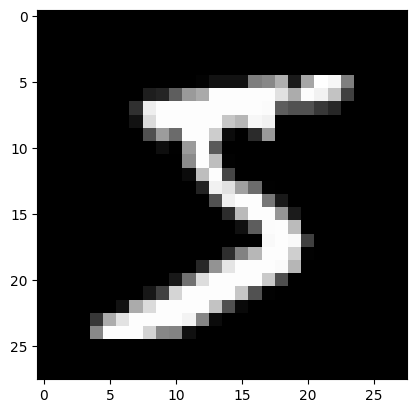

In [40]:
plt.imshow(x_train[0], cmap="gray")
plt.show()

## In order to ensure good model performance we will normalize colour values to fall between 0 and 1. To do this we can divide all values by 255. Moreover, we need to transform the samples from 28x28 to 28x28x1 to comply with Conv2D requirements. As it requires 3 dimensions for each sample (height, width, channels) we will add another axis which will act as the grayscale. While this step may seem redundant on the surface, as the image is already in grayscale and creating this additional dimension does not provide any new information, it is done to comply with Conv2D design.

In [41]:
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train[0])

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## Let us check the shape of the train dataset to make sure it all complies with the Conv2D requirements.

In [42]:
print(x_train.shape)

(60000, 28, 28, 1)


## We can observe the shape of the x_train dataset consists of 4 dimensions: sample_size, height, width, channels.

## Let us now create full train and test datasets from x_train, y_train, x_test, y_test. For the train dataset we will shuffle it with a buffer of 10000 samples in order to prevent the model from learning any patterns related to the order in which data is being fed. Both datasets will be batched into batch sizes of 32 samples, meaning the weights will be adjusted every 32 samples instead of every sample in order to improve efficiency.

In [43]:
train_data = tf.data.Dataset.from_tensor_slices((x_train,y_train)).shuffle(10000).batch(32)
test_data = tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(32)

## Now we create the model. It will use 6 layers in total:\
## - Conv2D: this layer applies 64 3x3 filters to the input data with the ReLI activation function,
## - MaxPooling2D: downsampling the data by selecting the highest value from every 2x2 region, used to reduce the size of the data while (ideally) maintaining all necessary detail,
## - Flatten: transform the data from 2D output to 1D to fit in the coming Dense layers,
## - Dense: a 128 neuron layer with ReLU activation function where each neuron is connected with each data point, hence the flattening of the data into 1D,
## - Dropout: randomly selects a potion of data, in this case 20%, and turns it all to zeros with the idea of overfitting prevention,
## - Dense: a 10 neuron layer with softmax activation function where each neuron corresponds to a single MNIST digit class.

In [44]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax"),
]);

## Now we compile the model with Adam optimizer

In [45]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]);

## We train the model and evaluate its performance

In [46]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test, y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1626 - accuracy: 0.9512
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0593 - accuracy: 0.9809
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0401 - accuracy: 0.9874
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0290 - accuracy: 0.9905
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0214 - accuracy: 0.9931
313/313 - 0s - loss: 0.0396 - accuracy: 0.9866 - 469ms/epoch - 1ms/step


[0.03956375643610954, 0.9865999817848206]

## We find that after 5 epochs (training cycles) the model scores over 98% (run dependant) accuracy on the training data. From this we can assume one of two things, either the model performs very well or is overfitting to the training data. We confirm its performance with the test dataset where we obtain over 98% (run dependant) accuracy, meaning the model did not overfit to the training data and in fact performs very well.